In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from pprint import pprint
from itertools import chain

from IPython.display import Image, display
# from lark import Lark, Tree, Token, Transformer, v_args
# from lark import tree as larkTree
# from lark.indenter import Indenter

import parser as P
import automata as A


strict digraph "" {
	"~" -> Example1;
	Example1 -> "George Washington";
	Example1 -> max;
	"/0/0" -> max;
}



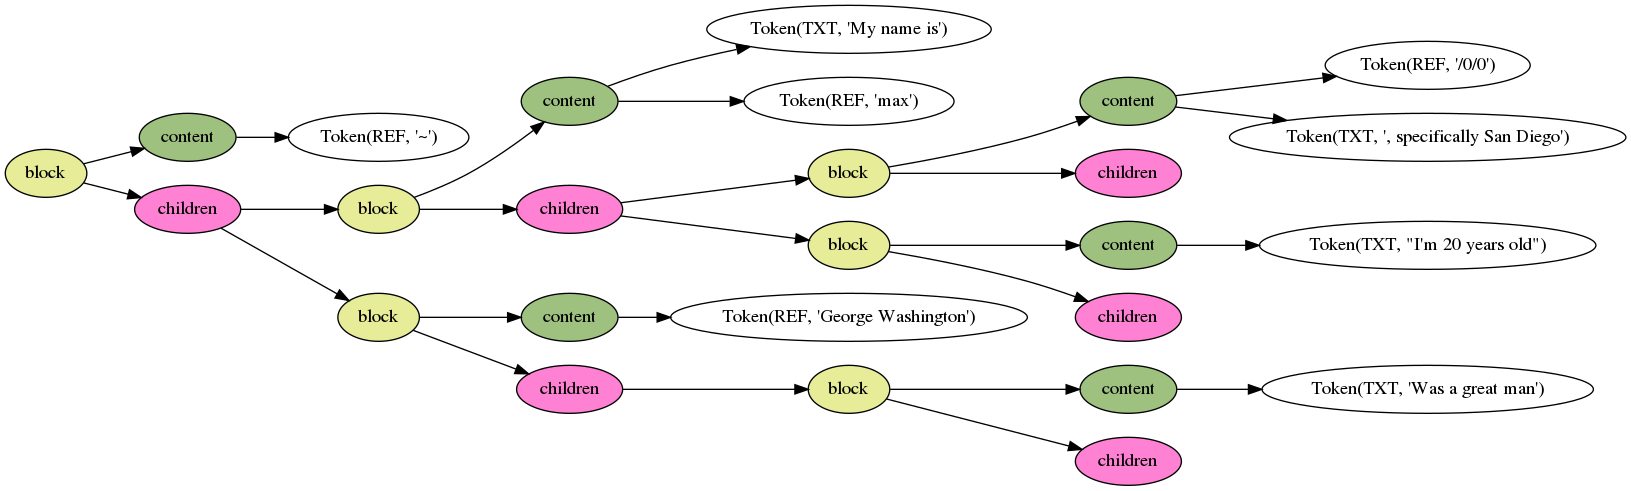

In [2]:
t = '''
- My name is [[max]]
  - [[/0/0]], specifically San Diego
  - I'm 20 years old
- [[George Washington]]
  - Was a great man
'''

NOTES_DATA = P.Block(content=[P.Token('REF', value='~')], children=P.parse_blocks(t))

NOTES_DATA.show()

{'/0/0', 'George Washington', 'max', '~'}


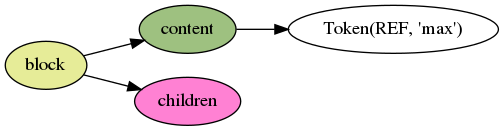

In [3]:
print(NOTES_DATA.get_refs(depth=10))
P.resolve_ref_block('max', NOTES_DATA).show()


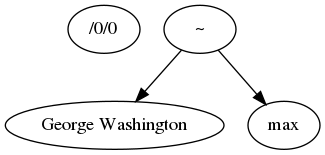

In [5]:

rules = A.Ruleset('test')

all_references = NOTES_DATA.get_refs(depth=100)
for x in all_references:
    rules.add_instance(x, x)
    block = P.resolve_ref_block(x, NOTES_DATA)
    for ref in block.get_refs(depth=1):
        if x != ref:
            rules.add_relation(x, ref)

rules.draw()

Image('./rules.png')
